# Guia 2.1

## Ejercicio 4

Encuentre la respuesta al impulso de los sistemas LTI causales descriptos por las siguientes ecuaciones en diferencias y clasifíquelos en función de esta. Utilice condiciones iniciales nulas.

1. $y[n] - y[n-2] = x[n]$
2. $y[n] = x[n] + 0.5x[n-1]$
3. $y[n] - 0.5y[n-1] + 0.25y[n-2] = x[n]$

$$
\begin{align*}
    y[n] - y[n-2] &= x[n]\\
    y[n] &= x[n] + y[n-2]
\end{align*}
$$
$$
\begin{align*}
    y[n] &= x[n] + 0.5x[n-1]
\end{align*}
$$
$$
\begin{align*}
    y[n] - 0.5y[n-1] + 0.25y[n-2] &= x[n]\\
    y[n] &= x[n] + 0.5y[n-1] - 0.25y[n-2]
\end{align*}
$$

<StemContainer object of 3 artists>

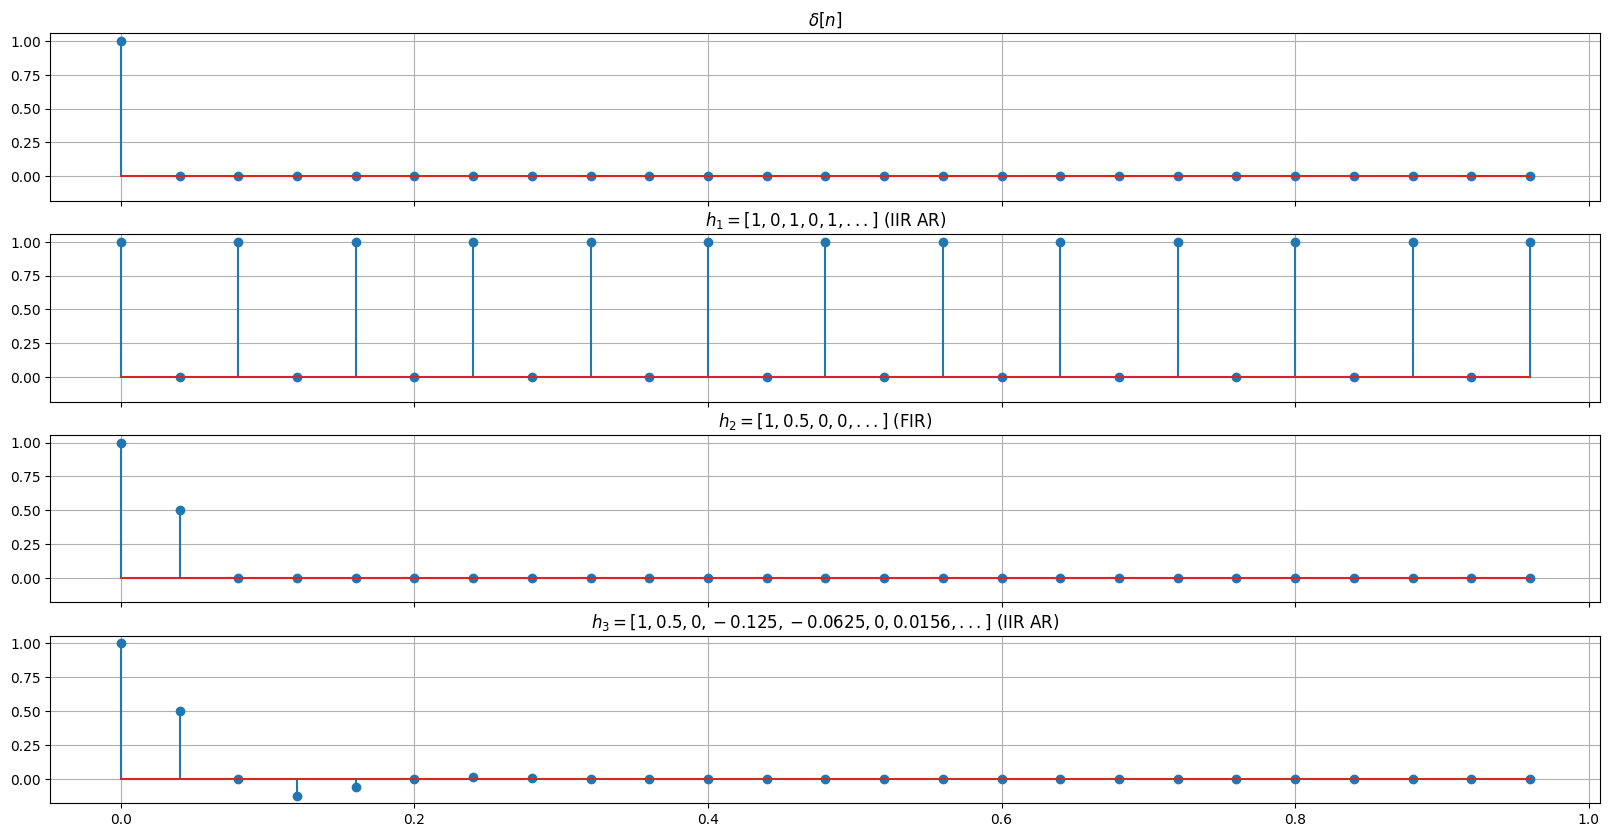

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
Impulso de magnitud A
'''
def impulso(tini,tfin,fm,A):
    t = np.linspace(tini,tfin,int(fm*(tfin-tini)),endpoint=False)

    return t, np.multiply(np.equal(t,[0]*len(t)),[A]*len(t))

# Parametros
tini = 0
tfin = 1
fm = 25
T = 1.0/fm
# entrada (impulso unitario)
t,x = impulso(tini,tfin,fm,1)

# salidas
y = [[],[],[]]
y[0] = np.array(x.copy(),dtype=float)
y[1] = np.array(x.copy(),dtype=float)
y[2] = np.array(x.copy(),dtype=float)
# 1: y[n] = x[n] + y[n-2]
for n in range(2,len(t)):
    y[0][n] += y[0][n-2]
# 2: y[n] = x[n] + 0.5x[n-1]
for n in range(1,len(t)):
    y[1][n] = y[1][n] + 0.5*x[n-1]
# 3: y[n] = x[n] + 0.5y[n-1] - 0.25y[n-2]
for n in range(1,len(t)):
    y[2][n] = y[2][n] + 0.5*y[2][n-1]
    if n > 1:
        y[2][n] = y[2][n] - 0.25*y[2][n-2]

fig, ax = plt.subplots(4, sharex=True, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(10)

for i in range(4):
    ax[i].grid()

ax[0].set_title('$\\delta[n]$')
ax[0].stem(t,x)
ax[1].set_title('$h_1=[1,0,1,0,1,...]$ (IIR AR)')
ax[1].stem(t,y[0])
ax[2].set_title('$h_2=[1,0.5,0,0,...]$ (FIR)')
ax[2].stem(t,y[1])
ax[3].set_title('$h_3=[1,0.5,0,-0.125,-0.0625, 0, 0.0156, ...]$ (IIR AR)')
ax[3].stem(t,y[2])